## 영화평점에 대한 변화(시각화) - 네이버영화

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error   import HTTPError
from urllib.error   import URLError

In [12]:
# sub_url 옆에 date 날짜 바꿔도 값이 나온다 
base_url = 'http://movie.naver.com/'
sub_url='movie/sdb/rank/rmovie.nhn?sel=cur&date=20170501'

# 오픈을 할때 예외처리를 통해 만약 오류가 생기면 원인을 알수 있게 함수 있음
# url을 지정해도 되고 urlopen안에 url을 입력해도 된다
try :
    html = urlopen(base_url+sub_url)  
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')
   

In [13]:
soup.find_all('div','tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=147092" title="히든 피겨스">히든 피겨스</a>
</div>

In [ ]:
soup.find_all('div','tit5')[0].a.string #1) <a> 태그 안에있는 text가져올수 있음

In [ ]:
soup.find_all('div','tit5')[0].a.get_text() #2) <a> 태그 안에있는 text가져올수 있음

In [ ]:
soup.find_all('div','tit5')[1]

* 평점을 추출한다면 

In [ ]:
soup.find_all('td','point') # 리스트 형식인것을 확인 할 수 있다.

In [ ]:
soup.find_all('td','point')[0].string # text가져올수 있음

- dataframe을 만들기 위해서는 셀의 길이가 동일해야하므로 확인절차가 필요하다

In [ ]:
print('영화이름 : ' , len(soup.find_all('div','tit5')))
print('평점 : ' , len(soup.find_all('td','point')))

In [ ]:
# 루프 돌리는 방법

movie_names = [soup.find_all('div','tit5')[n].a.get_text() for n in range(0, 50)]
print(len(movie_names))
print((movie_names))

point = [soup.find_all('td','point')[n].string for n in range(0, 50)]
print(len(point))
print(point)

In [23]:
import pandas as pd

In [3]:
# 날짜 index를 가져온다 periods기간만큼 freq는 일자를 나타내는것으로 추정
date = pd.date_range('2017-5-1',periods=100,freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [5]:
import urllib
from tqdm import tqdm_notebook #tqdm 진행 상태를 나타내줌
import time


In [6]:
for n in tqdm_notebook(range(100)):
    time.sleep(0.1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [7]:
for x in tqdm_notebook(range(2), desc = 'outer') :
    for y in tqdm_notebook(range(1000), desc = 'inner') :
        time.sleep(0.1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [18]:
names_result = []
points_result = []
date_result = []

In [19]:
base_url = 'http://movie.naver.com/'
sub_url='movie/sdb/rank/rmovie.nhn?sel=cur&date='

# extend는 요소안에 있는 값들을 붙여줌 append는 요소자체를 붙임 append를 쓰면 리스트안에 리스트를 넣어주는 현상이 발생됨

for day in tqdm_notebook(date):
    html = base_url+sub_url+'{date}' # 여기서 date는 가변수 
    response = urlopen(html.format(date=urllib.parse.quote(day.strftime('%Y%m%d'))))#  urllib.parse.quote 는 특수문자를 문자형태로 반영..?
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td','point'))
    names_result.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)])
    points_result.extend([soup.find_all('td','point')[n].string for n in range(0, end)])
    date_result.extend([day for n in range(0,end)])
            

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [21]:
print(len(names_result))
print(len(points_result))
print(len(date_result))

4723
4723
4723


In [28]:
movieDF=pd.DataFrame({'date' : date_result , 'name' : names_result, 'point' : points_result})

In [31]:
movieDF.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [32]:
movieDF.tail()

,date,name,point
4718,2017-08-08,송 투 송,6.88
4719,2017-08-08,그 후,6.58
4720,2017-08-08,박쥐,6.09
4721,2017-08-08,싸이보그지만 괜찮아,5.17
4722,2017-08-08,군함도,5.02


In [33]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [ ]:
# point를 object -> 수치형으로 변환시키기(수치형을 통해 시각화를 하기위해)


* astype() 함수를 이용해서 컬럼의 타입을 변경할 수 있다.

In [34]:
type(movieDF['point']) # dateframe안에 있는 cell은 series라고 나타낸다 vector라고 생각하면됨

pandas.core.series.Series

In [35]:
movieDF['point'] = movieDF['point'].astype(float)

In [36]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [37]:
# 시각화를 위한 module

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 내가 원하는 영화의 평점을 총점으로 확인하고 싶다면?
- 피벗 테이블을 이용할 수 있다.

In [38]:
# group by 느낌이라고 생각하면 된다.
movie_pivot = pd.pivot_table(movieDF,index=['name'],aggfunc=np.sum)
movie_pivot

,point
name,
10분,124.46
47 미터,149.23
500일의 썸머,75.51
7년-그들이 없는 언론,137.28
7번째 내가 죽던 날,407.48
7인의 사무라이,36.60
8 마일,195.36
가디언즈 오브 갤럭시,34.22
가디언즈 오브 갤럭시 VOL. 2,484.45


- 결과에 대한 정려리 필요한 경우 sort_values(by=,ascending=)

In [41]:
movie_pivot_sort = movie_pivot.sort_values(by='point',ascending=False) # ascending=True 오름차순 / False 내림차순

In [42]:
movie_pivot_sort

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42
노무현입니다,682.24
보스 베이비,644.21
겟 아웃,630.62
기쿠지로의 여름,613.43


In [49]:
temp = movieDF.query('name==["겟 아웃"]') # 특정영화에 대한 값도 확인 할 수 있다.

In [50]:
temp

,date,name,point
833,2017-05-17,겟 아웃,8.36
889,2017-05-18,겟 아웃,8.18
933,2017-05-19,겟 아웃,8.20
980,2017-05-20,겟 아웃,8.18
1022,2017-05-21,겟 아웃,8.18
1061,2017-05-22,겟 아웃,8.11
1102,2017-05-23,겟 아웃,8.15
1146,2017-05-24,겟 아웃,8.15
1192,2017-05-25,겟 아웃,8.15
1236,2017-05-26,겟 아웃,8.16


- 시각화 

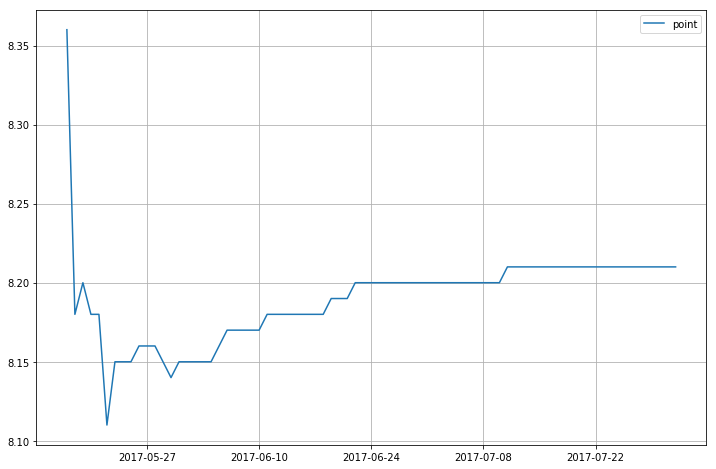

In [52]:
# 1) 시각화 틀 만들기 
plt.figure(figsize=(12,8))
plt.plot(temp['date'],temp['point'])
plt.legend(loc="best")
plt.grid()
plt.show()

- 영화별 날짜 변화에 따른 평점 변화 시각화 [실습]

In [53]:
movie_date_point_pivot=pd.pivot_table(movieDF, index=['date'],columns=['name'],values=['point'])

In [54]:
movie_date_point_pivot

point                                                         \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이  8 마일   
date                                                                      
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-06  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-07  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-08  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-09  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-10  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-11  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-12  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-13  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-14  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-15   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-16   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-17   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-18   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-19   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-20   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-21   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-22   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-23   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-24   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-25   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-26   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-27   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-28   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-29   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-30   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
...          ...   ...      ...          ...         ...      ...   ...   
2017-07-10   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-11   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-12   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-13   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-14   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-15   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-16   NaN   NaN      NaN         8.58        7.85      NaN   NaN   
2017-07-17   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-18   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-19   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-20   NaN  7.48      NaN          NaN        7.84      NaN   NaN   
2017-07-21   NaN  7.34      NaN          NaN        7.84      NaN   NaN   
2017-07-22   NaN  7.79      NaN          NaN        7.84      NaN   NaN   
2017-07-23   NaN  7.58      NaN          NaN        7.84      NaN   NaN   
2017-07-24   NaN  7.55      NaN          NaN        7.84     9.15   NaN   
2017-07-25   NaN  7.53      NaN          NaN        7.84     9.15   NaN   
2017-07-26   NaN  7.48      NaN          NaN        7.84     9.15   NaN   
2017-07-27   NaN  7.49      NaN          NaN        7.85     9.15   NaN   
2017-07-28   NaN  7.46      NaN          NaN        7.85      NaN   NaN   
2017-07-29   NaN  7.45      NaN     

In [55]:
movie_date_point_pivot.columns=movie_date_point_pivot.columns.droplevel()

In [56]:
movie_date_point_pivot

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37
2017-05-06,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.05,NaN,...,NaN,NaN,8.78,NaN,NaN,8.68,NaN,NaN,9.25,9.37
2017-05-07,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.55,9.02,NaN,...,NaN,NaN,8.78,NaN,NaN,8.68,NaN,NaN,9.27,9.37
2017-05-08,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.28,9.36
2017-05-09,8.89,NaN,NaN,NaN,NaN,NaN,8.88,NaN,8.99,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.28,9.36


In [58]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


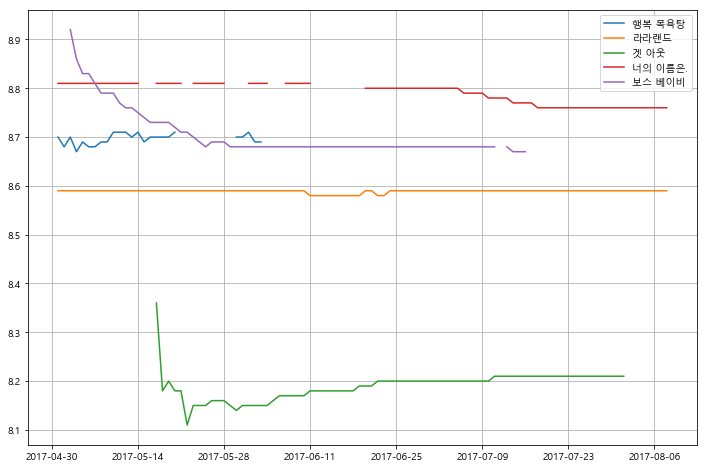

In [60]:
target_col=['행복 목욕탕','라라랜드','겟 아웃','너의 이름은.','보스 베이비']
plt.figure(figsize=(12,8))
plt.plot(movie_date_point_pivot[target_col])
plt.legend(target_col,loc="best")
plt.grid()
plt.show()